In [ ]:
import nltk
nltk.download('stopwords')
import pickle

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
pip install gensim==3.8.3

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install np_utils==0.5.12.1

     |████████████████████████████████| 61 kB 7.0 MB/s 
  Created wheel for np-utils: filename=np_utils-0.5.12.1-py3-none-any.whl size=57125 sha256=77ffef18dde6eaebac874d8b6c9c70cf679a5ea82b2308d97efd33e431598c24
  Stored in directory: /root/.cache/pip/wheels/8c/4e/ef/095c24693723c329f4cdc1079861cdbb2487d4b41b2496a4e7
Successfully built np-utils
  Attempting uninstall: np-utils
    Found existing installation: np-utils 0.6.0
    Uninstalling np-utils-0.6.0:
      Successfully uninstalled np-utils-0.6.0
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
pip install scikit-plot

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Fake news detection
The Keras version of neural network
"""

from  getEmbeddings import getEmbeddings
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras 
from tensorflow.keras import backend as K
import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, Input, RepeatVector
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import scikitplot.plotters as skplt
import os




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:


# Read the data
if not os.path.isfile('./xtr.npy') or \
    not os.path.isfile('./xte.npy') or \
    not os.path.isfile('./ytr.npy') or \
    not os.path.isfile('./yte.npy'):
    xtr,xte,ytr,yte = getEmbeddings("datasets/train.csv")
    np.save('./xtr', xtr)
    np.save('./xte', xte)
    np.save('./ytr', ytr)
    np.save('./yte', yte)

xtr = np.load('./xtr.npy')
xte = np.load('./xte.npy')
ytr = np.load('./ytr.npy')
yte = np.load('./yte.npy')
ytr = np.where(ytr<1, 1, 0)
yte = np.where(yte<1, 1, 0)




In [ ]:

x_train, x_test, y_train, y_test = train_test_split(xtr, ytr, test_size=0.2, random_state=42)

In [ ]:
print(y_train)


[1 1 1 ... 1 0 0]


In [ ]:
print(x_train.shape)
print(x_train)

(6396, 300)
[[-5.03919959e-01  1.08449662e+00 -4.89026368e-01 ... -2.45303378e-01
   1.12291324e+00  7.47111142e-02]
 [-4.80423391e-01 -2.19838470e-02  6.18526697e-01 ... -4.21398729e-02
  -1.61386162e-01  1.80588558e-01]
 [ 4.48938251e-01  2.33382747e-01  3.65224361e-01 ... -2.81943798e-01
   1.60297647e-01 -4.97941732e-01]
 ...
 [ 6.69540644e-01  1.26391605e-01  7.31868371e-02 ... -1.72152132e-01
   2.38453820e-01 -5.46325743e-01]
 [ 3.46862048e-01  1.73843265e-01  4.67469729e-02 ... -3.78008634e-01
   7.87545800e-01  4.19207573e-01]
 [-1.03207669e-04 -3.29028029e-04 -2.33980216e-04 ...  9.15699813e-04
  -1.17929478e-03 -4.37680574e-04]]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(x_train, y_train);



 


In [ ]:
model =rf 
y_pred=model.predict(x_test)


In [ ]:
print(y_pred)

[0.96 0.3  0.15 ... 0.5  0.88 0.47]


In [ ]:
y_pred = np.where(y_pred>0.5, 1, 0)
print(y_pred)

[1 0 0 ... 0 1 0]


In [ ]:
with open('rf.sav', 'wb') as files:
    pickle.dump(model, files)

In [ ]:
m = y_test.shape[0]
tp=0
tn=0
fp=0
fn=0
for i in range(m):
    if (y_pred[i]==0 and (y_test[i]!=y_pred[i])):
        fn+=1
    elif (y_pred[i]==1 and (y_test[i]!=y_pred[i])):
        fp+=1
    elif (y_pred[i]==0 and (y_test[i]==y_pred[i])):
        tn+=1
    elif (y_pred[i]==1 and (y_test[i]==y_pred[i])):
        tp+=1

precision=(tp)/(tp+fp)*100
recall=(tp)/(tp+fn)*100
print("Accuracy = " + format((tp+tn)/(tp+tn+fp+fn)*100, '.2f') + "%")   
print("F1-Score = " + format(((2*precision*recall)/(precision+recall)), '.2f') + "%")   
print("Recall = " + format((tp)/(tp+fn)*100, '.2f') + "%")   
print("Precision = " + format((tp)/(tp+fp)*100, '.2f') + "%")   
print("Specificity = " + format((tn)/(tn+fp)*100, '.2f') + "%")  

Accuracy = 84.37%
F1-Score = 83.29%
Recall = 82.96%
Precision = 83.62%
Specificity = 85.61%


/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


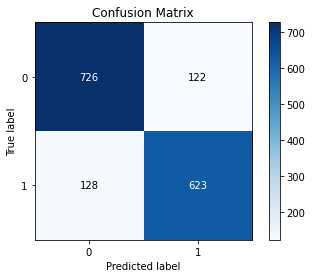

In [ ]:
# Draw the confusion matrix
def plot_cmat(yte, ypred):
    '''Plotting confusion matrix'''
    skplt.plot_confusion_matrix(yte, ypred)
    plt.grid(False)
    plt.show()
    
plot_cmat(y_test, y_pred)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3a2c2a1b-c190-4238-a7b0-93cabb99b4e1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>